In [24]:
from fastai import *
from fastai.vision import *
import matplotlib as plt

In [68]:
path = untar_data(aiv.URLs.PETS)
path

PosixPath('/storage/data/oxford-iiit-pet')

In [69]:
path.ls()

[PosixPath('/storage/data/oxford-iiit-pet/images'),
 PosixPath('/storage/data/oxford-iiit-pet/annotations')]

In [70]:
path_anno = path/'annotations'
path_img = path/'images'

In [28]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/storage/data/oxford-iiit-pet/images/pug_109.jpg'),
 PosixPath('/storage/data/oxford-iiit-pet/images/Russian_Blue_30.jpg'),
 PosixPath('/storage/data/oxford-iiit-pet/images/chihuahua_64.jpg'),
 PosixPath('/storage/data/oxford-iiit-pet/images/Bombay_9.jpg'),
 PosixPath('/storage/data/oxford-iiit-pet/images/wheaten_terrier_9.jpg')]

In [12]:
import numpy as np
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [29]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pug,Russian_Blue,chihuahua,Bombay,wheaten_terrier
Path: /storage/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,keeshond,Abyssinian,miniature_pinscher,Egyptian_Mau
Path: /storage/data/oxford-iiit-pet/images;

Test: None

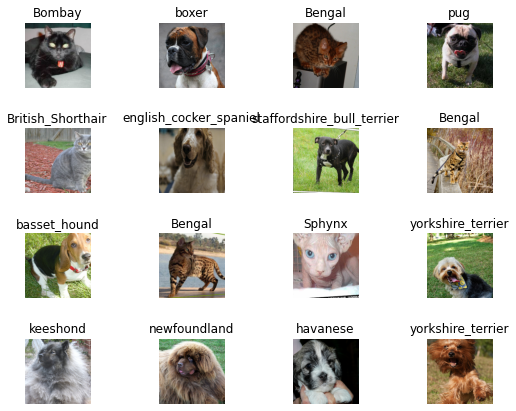

In [30]:
data.show_batch(rows=4, figsize=(7,6))

In [31]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [34]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [35]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.363228,0.388315,0.118403,00:32
1,0.607041,0.270298,0.087280,00:26
2,0.370700,0.245500,0.079161,00:26
3,0.278975,0.236366,0.076455,00:25


In [36]:
learn.save('stage1')

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

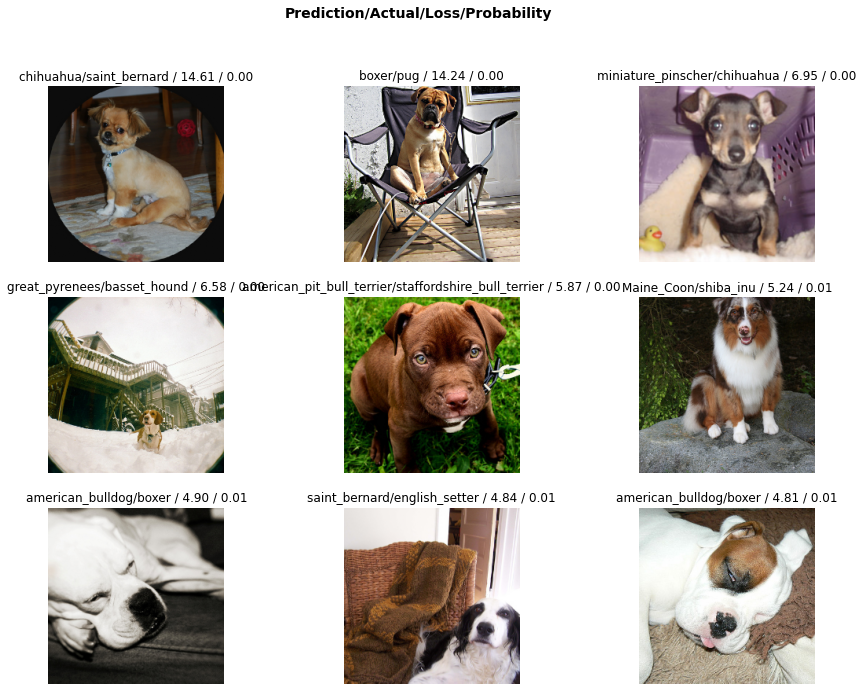

In [39]:
interp.plot_top_losses(9, figsize=(15,11))

In [40]:
doc(interp.plot_top_losses)

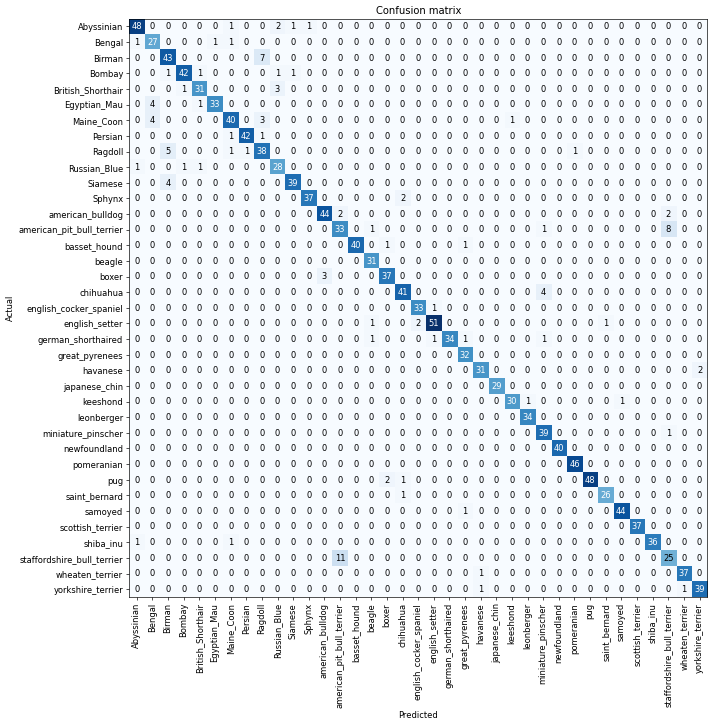

In [42]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [43]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 11),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Birman', 'Ragdoll', 7),
 ('Ragdoll', 'Birman', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Maine_Coon', 'Bengal', 4),
 ('Siamese', 'Birman', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('boxer', 'american_bulldog', 3),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('pug', 'boxer', 2)]

In [44]:
learn.unfreeze()

In [45]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.693057,0.354818,0.108931,00:28


In [46]:
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pug,Russian_Blue,chihuahua,Bombay,wheaten_terrier
Path: /storage/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,keeshond,Abyssinian,miniature_pinscher,Egyptian_Mau
Path: /storage/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pa

In [47]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


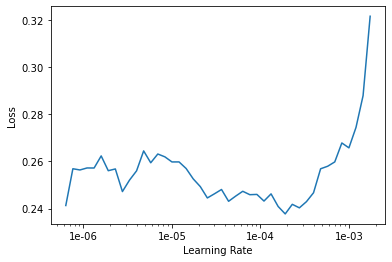

In [48]:
learn.recorder.plot()

In [50]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.204252,0.210737,0.070365,00:27
1,0.185958,0.205234,0.062923,00:27
2,0.182393,0.201693,0.064276,00:27
3,0.159180,0.199555,0.060893,00:27


In [51]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [52]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.853195,0.312096,0.093369,00:41
1,0.463550,0.261416,0.073748,00:39
2,0.280691,0.212092,0.064276,00:39
3,0.204327,0.179581,0.057510,00:38


In [53]:
learn.save('stage1-50')

In [54]:
interp = ClassificationInterpretation.from_learner(learn)

In [55]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Ragdoll', 'Birman', 5),
 ('Birman', 'Ragdoll', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('boxer', 'american_bulldog', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('german_shorthaired', 'beagle', 2),
 ('keeshond', 'leonberger', 2)]

In [71]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/storage/data/mnist_sample')

In [72]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

In [73]:
(path/'train').ls()

[PosixPath('/storage/data/mnist_sample/train/7'),
 PosixPath('/storage/data/mnist_sample/train/3')]

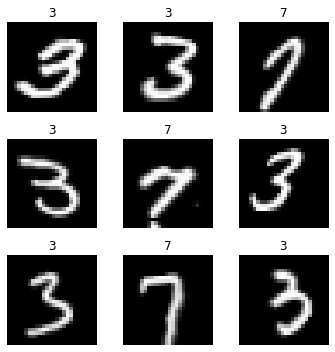

In [75]:
data.show_batch(rows=3, figsize=(5,5))

In [78]:
learn = cnn_learner(data, models.resnet50, metrics = accuracy)

In [79]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.244761,0.140529,0.959764,00:11
1,0.141331,0.067727,0.973503,00:11


In [85]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [81]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

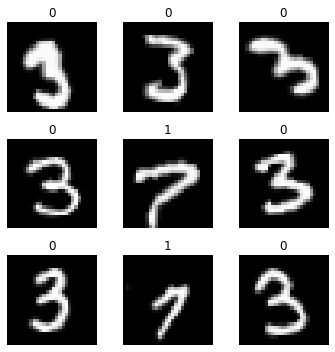

In [82]:
data.show_batch(rows=3, figsize=(5,5))

In [86]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [87]:
fn_paths = [path/name for name in df['name']]
fn_paths[:2]

[PosixPath('/storage/data/mnist_sample/train/3/7463.png'),
 PosixPath('/storage/data/mnist_sample/train/3/21102.png')]

In [90]:
pat = r"/(\d)/\d+\.png"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [92]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24, 
                                     label_func = lambda x: '3' if '/3/' in str(x) else '7' )
data.classes

['3', '7']

In [93]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [94]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [95]:
doc(ImageDataBunch)